In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pink_utils as pu
import numpy as np
from tqdm import tqdm
from collections import defaultdict
from matplotlib.collections import LineCollection
import matplotlib.colors as mpc

In [2]:
ed = pu.heatmap('../Small/FIRST_F1W1_95_5_Small_Similarity.bin')
som = pu.som('../Small/FIRST_F1W1_95_5_L1_SOM_Small_5.bin')

In [3]:
data = ed.data

In [4]:
data.shape
data = data.reshape((data.shape[0], np.prod(data.shape[1:])))

In [5]:
data.shape

(178859, 144)

In [6]:
sort = np.argsort(data,axis=1, )

In [7]:
sort.shape

(178859, 144)

In [8]:
sort[0]

array([ 23,  36,  33,  45,  81,  11,  34,  22,  46,  12,  35,  10,  69,
        82,  44,  70,  56,  52,  41,  30,  48,  13,  60,  24,  59,  31,
        18,  64,  80,  50,  49,  94,  38,  71,  61,   0,  39,  43,  73,
        63,  20,  14,  40,  74,  75,  21,  62,  47,  79,  55,  26,   1,
        83,  95,  57,  93,  51,  25,  68,  67,  54,  76,  86,  32,  72,
        99, 125,   2,  29,  37,   3,  58, 134,  91, 102,  78, 135, 112,
       133, 142,  19,  89, 132,  15, 116,  85, 143,   9, 103,  90,  27,
       100, 137,  65, 105, 124, 129,  84,   6, 113, 111, 123, 136,  92,
       138,  66, 110,   7,   4, 101, 127, 128, 106,   8, 114, 107, 117,
       115,  88,  98,  77, 118, 104, 140,  42,  97,  53,  96, 131, 139,
       122, 108,  28, 109, 126,  87,   5, 130, 141, 119,  16, 121,  17,
       120])

In [9]:
d1 = sort[0]
print(data[0, d1])

[27.21973038 27.25498962 27.30414963 27.33701706 27.3611412  27.37958145
 27.3854351  27.45505905 27.4999485  27.57724953 27.60831451 27.61982155
 27.63266182 27.64016342 27.64122009 27.71078491 27.72129059 27.76414871
 27.77180862 27.81210709 27.82413673 27.83188629 27.86454391 27.93677902
 27.94841003 27.97200012 28.00411606 28.01729965 28.02625656 28.06278992
 28.07839966 28.08263397 28.0926609  28.14101601 28.17061996 28.18030167
 28.18206787 28.28911209 28.44234085 28.54275513 28.70014572 28.79538727
 28.87903595 29.05148315 29.05754089 29.09313965 29.09663582 29.10591507
 29.17765808 29.1895237  29.18994141 29.25405884 29.26306343 29.28523445
 29.47168541 29.49829865 29.79553795 29.85862732 30.0544529  30.18828392
 30.26977921 30.27907562 30.28256035 30.31393051 30.32562065 30.45088577
 30.58152771 30.58953667 30.687397   30.79354095 31.0506134  31.39000702
 31.39133644 31.50516319 31.64640045 31.70125198 31.86836052 31.87900734
 31.99848366 32.0575943  32.13298798 32.1968689  32

In [10]:
counts = defaultdict(float)


In [11]:
for i in sort[:]:
    for p, (x, y) in enumerate(zip(i[:-1], i[1:])):
        if y > x:
            x, y = y, x
        counts[(x,y)] += 1

In [12]:
print(max(counts.values()))
print(len(counts.values()))

166577.0
10296


100%|██████████| 10296/10296 [00:00<00:00, 205218.57it/s]


Adding lines


/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


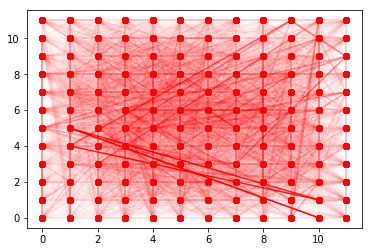

In [13]:
max_thickness = 100
max_val = max(counts.values())
min_cnt = 1000

fig, ax = plt.subplots(1,1)
x = []
y = []
l = []
a = []
corners = []
for k, v in tqdm(counts.items()):
    k1 = np.unravel_index(k[0], (12,12))
    k2 = np.unravel_index(k[1], (12,12))
    
    corners.append((k1, k2))
    x += [k1[0], k2[0]]
    y += [k1[1], k2[1]]

    if v > min_cnt:
        l += [max_thickness * (v/max_val)]
        a.append(v/max_val)
    else:
        l += [0]
        a.append(0)

ax.scatter(x, y, color='red')

print('Adding lines')

colors = [mpc.to_rgba('red', alpha=i) for i in a]

lines = LineCollection(corners, colors=colors)
ax.add_collection(lines)

fig.show()


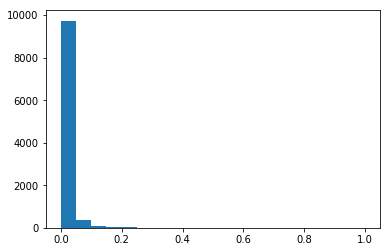

In [26]:
gcount = defaultdict(float)
max_val = max(counts.values())


import networkx as nx

G = nx.Graph()

for i in range(144):
    G.add_node(i)

vals = []
for k, v in counts.items():
    val = v/max_val
    vals.append(val)
    if val > 0.1:
        G.add_edge(k[0], k[1], weight=val)

fig, ax = plt.subplots(1,1)

ax.hist(vals, bins=20)

fig.show()


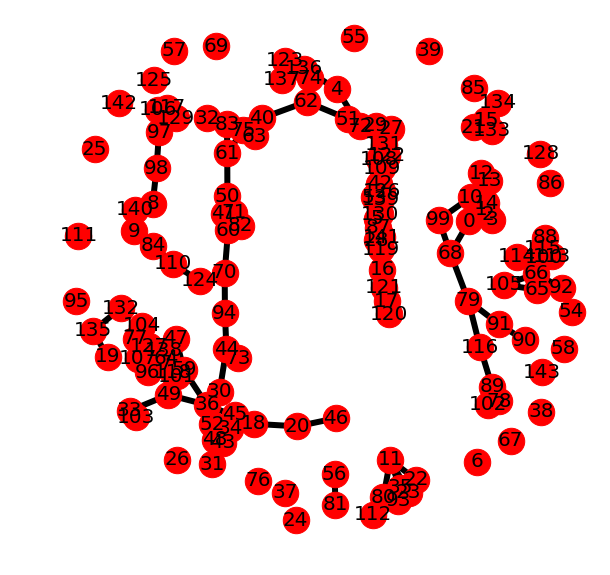

In [27]:
fig, ax = plt.subplots(1,1,figsize=(10,10))


# elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
# esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True)]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
# nx.draw_networkx_edges(G, pos, edgelist=elarge,
#                        width=6, ax=ax)
# nx.draw_networkx_edges(G, pos, edgelist=esmall,
#                        width=6, alpha=0.5, edge_color='b', style='dashed', ax=ax)

nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6,  ax=ax)


# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
fig.savefig('Cluster_Images/Cluster_Graph.pdf')

In [28]:
subs = [G.subgraph(c) for c in nx.connected_components(G)]
print(len(subs))

35


In [17]:
arr = np.zeros(144)
nums = np.arange(len(subs))
np.random.shuffle(nums)

for count, s in enumerate(subs):
    keys = np.array([k for k in s.nodes.keys()])
    arr[keys] = nums[count]

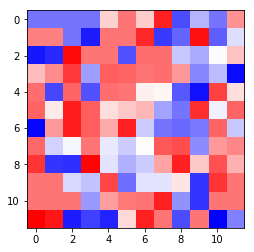

In [18]:
fig, ax = plt.subplots(1,1)

ax.imshow(arr.reshape((12,12)), cmap='bwr')

fig.savefig('Cluster_Images/Cluster_map.pdf')

In [19]:
nums = np.arange(144)
np.random.shuffle(nums)
print(nums)

[137  46  56  40  47  29  96  97  12  80 135 105 136  71 104  79 116 121
  17 117  62 106  13 131  19  28 128 132  87  98  55  49  14  51  53  43
  57  15  85 115   6 133  94 107  25  72 109 119 130  82  39  67 114  36
  18 108  73  83 110  27  10 125 113 142  63  33 143  89  42  50   1  64
  31  16  24  88  22  65  91  70  35  44   0 140  60  48  23 112  37  58
 124 101 129 100  99   4  81  52  75  95 118  92 122   5 139 134 138  45
  59  21  93  41  66  26 126  34  32  78 141  69 127   2 123  86  84  77
  68 103  20  61   8 120  90  76   7  74 102   9  38   3 111  11  54  30]


/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


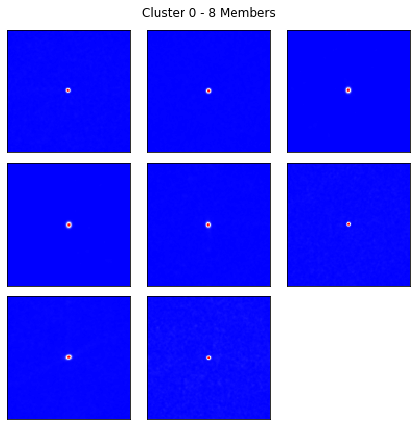

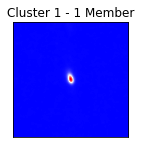

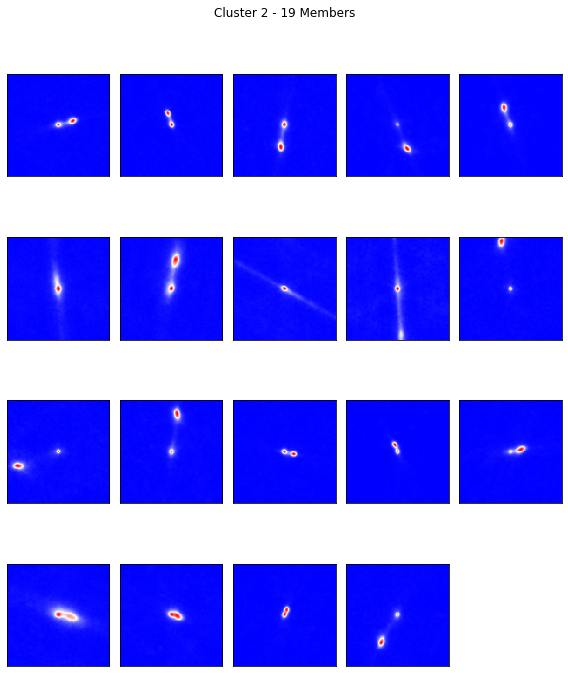

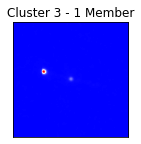

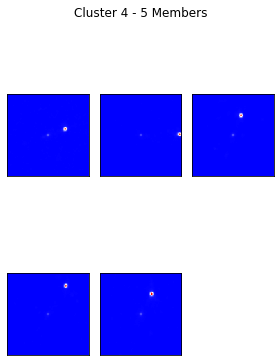

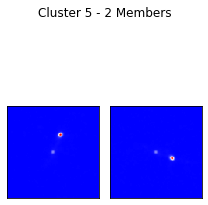

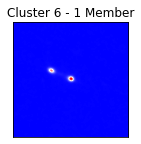

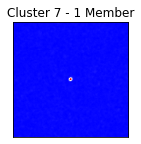

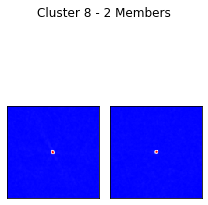

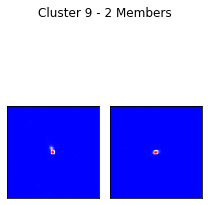

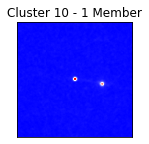

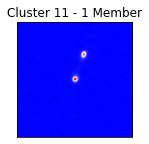

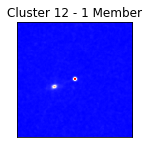

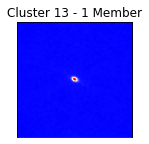

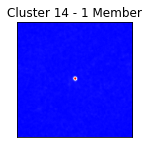

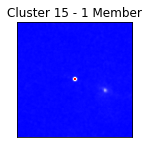

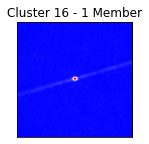

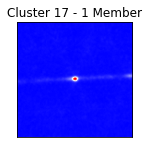

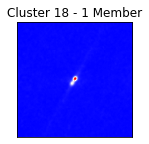

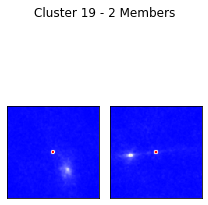

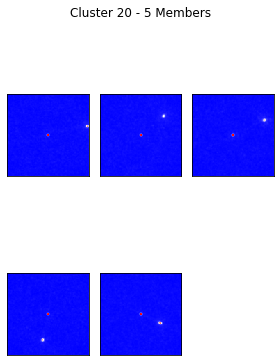

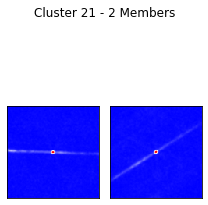

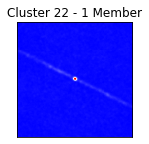

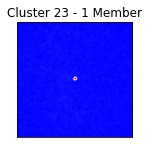

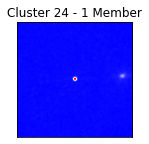

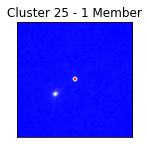

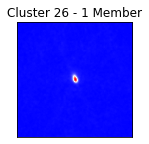

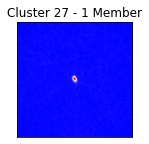

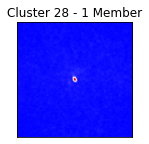

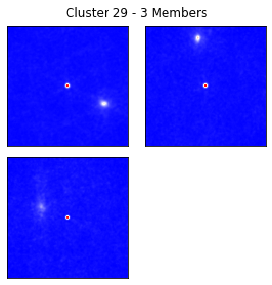

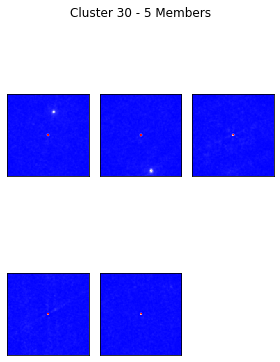

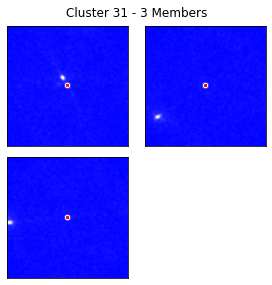

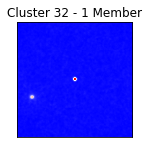

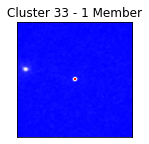

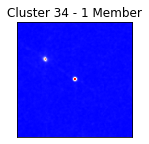

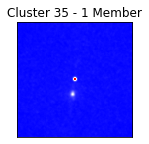

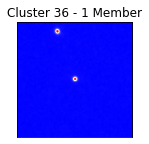

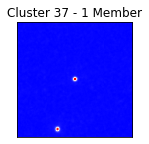

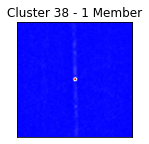

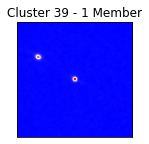

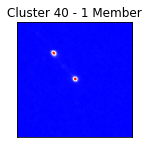

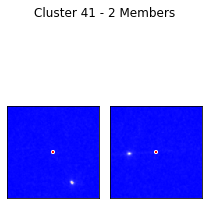

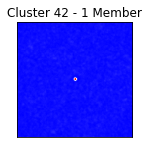

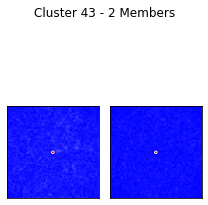

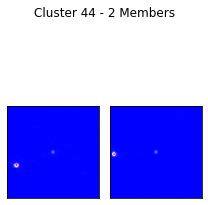

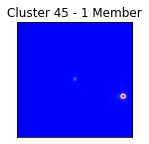

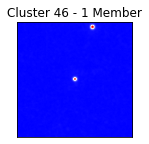

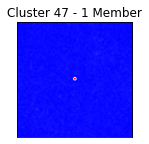

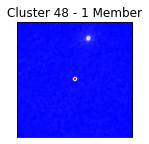

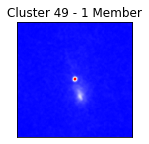

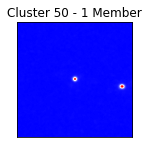

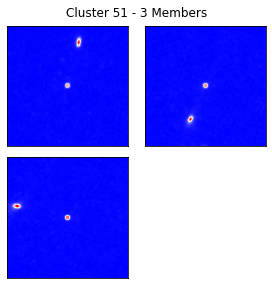

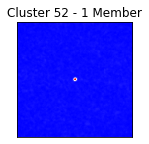

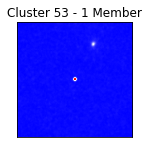

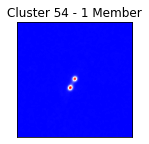

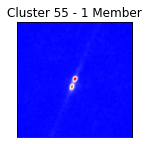

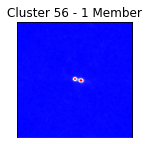

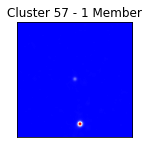

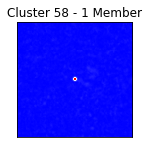

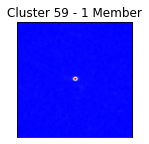

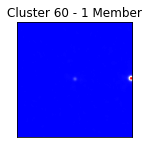

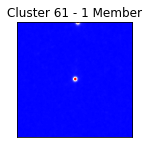

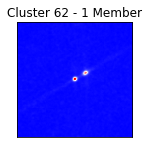

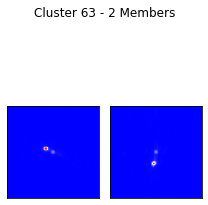

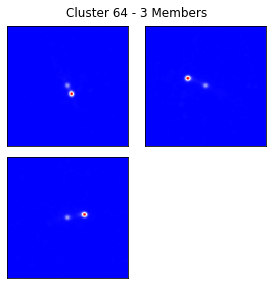

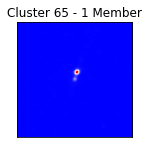

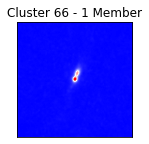

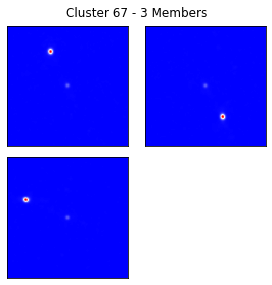

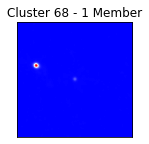

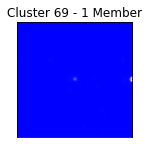

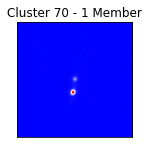

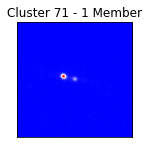

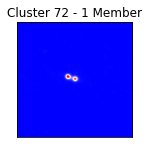

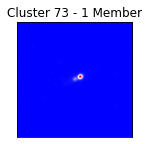

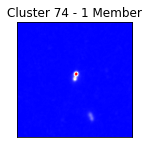

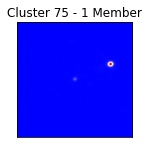

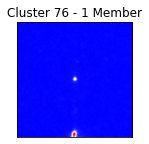

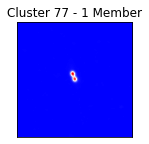

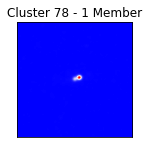

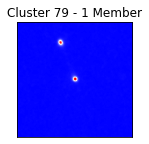

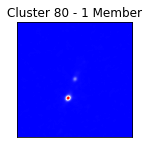

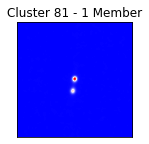

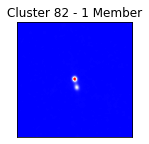

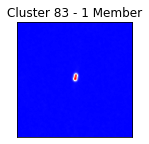

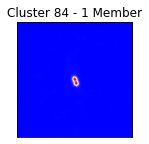

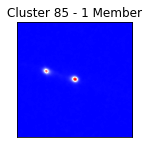

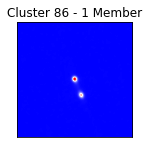

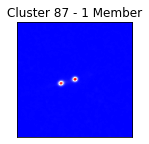

In [20]:
plt.close('all')

for count, s in enumerate(subs):
    keys = np.array([k for k in s.nodes.keys()])
    indx = np.unravel_index(keys, (12,12))

    ncol = int(len(keys)**0.5 + 1) if len(keys) > 1 else 1
    nrow = int(len(keys)/ncol+1) if len(keys) > ncol else 1
    
    fig, axes = plt.subplots(nrow, ncol, figsize=(max(nrow*2, 3), max(ncol*2, 2)))
    try:
        flat = axes.flat
    except:
        flat = [axes,]
    for ax, y, x in zip(flat, indx[0], indx[1]):
        ax.imshow(som.get_neuron(y=y, x=x, channel=0), cmap='bwr')
        pu.no_ticks(ax)
    
    for i in range(len(flat) - len(keys)):
        fig.delaxes(axes.flat[-(i+1)])
    
    fig.suptitle(f"Cluster {count} - {len(keys)} {'Members' if len(keys) > 1 else 'Member'}")
    fig.tight_layout(rect=[0,0,1,0.95])
    fig.savefig(f"Cluster_Images/{count}_cluster.pdf")

(2, 12, 12, 1, 118, 118)


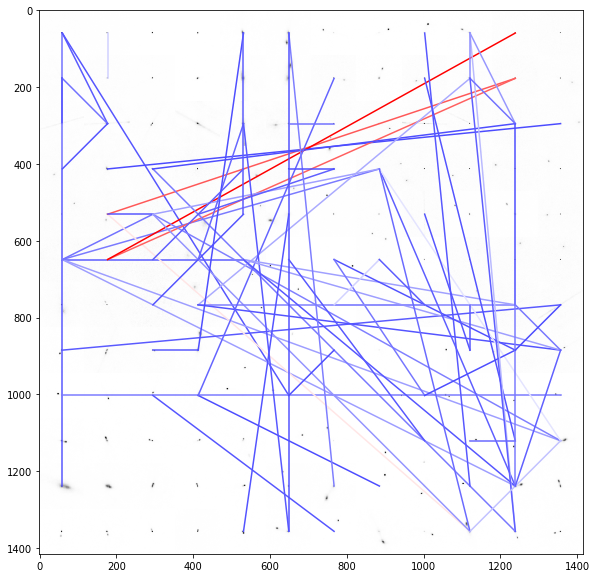

In [21]:
cmap = plt.get_cmap('bwr')

fig, ax = plt.subplots(1,1, figsize=(10,10))

header = som.file_head
ax.imshow(som.get_som(channel=0), cmap='Greys')

mid_x = header[4] // 2
mid_y = header[5] // 2
width_x = header[4]
width_y = header[5]

edges = [(u, v, d) for (u, v, d) in G.edges(data=True)]
print(header)

lines_x = []
lines_y = []
lines_weight = []
for x, y, w in edges:
    n1 = np.unravel_index(x, (12,12))
    n2 = np.unravel_index(y, (12,12))

    x1, y1 = n1[0]*width_x + mid_x, n1[1]*width_y + mid_y
    x2, y2 = n2[0]*width_x + mid_x, n2[1]*width_y + mid_y
    
    ax.plot((x1,x2), (y1, y2),color=cmap(w['weight']))
    
fig.show()